In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import decomposition
import statsmodels.api as sm
import statsmodels.formula.api as smf

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Storing the file path in 'loc' variable
# loc = (r"C:\Users\Minet\Documents\Repositories\Dev10_Final_Project\Datasets\MLModelDatasetPowerBI.csv")
loc = (r"C:\Users\Minet\Documents\Repositories\Dev10_Final_Project\Datasets\AltMLModelDatasetPowerBI.csv")
# Importing the file from the file path contained in 'loc' into 'df' 
df = pd.read_csv(loc)

In [3]:
df = df[['GraduationPercentageRate','HouseholdIncome','FundingPerStudent', 'Percentage of Minority Students', 'DistrictName']]
df.head()

,GraduationPercentageRate,HouseholdIncome,FundingPerStudent,DropoutPercentageRate,Percentage of Minority Students,DistrictName
0,97.0,115881.16,24424.21,1.0,27.8,YORKTOWN CSD
1,92.0,110606.50,27298.65,3.0,37.6,CARMEL CSD
2,89.0,53290.64,17149.15,5.0,25.9,CARTHAGE CSD
3,88.0,55387.63,20862.54,7.0,6.0,CASSADAGA VALLEY CSD
4,89.0,64765.75,18088.09,5.0,8.1,CATO-MERIDIAN CSD


In [4]:
# nysd = datasets.load_nystatedistricts()
features=['HouseholdIncome','FundingPerStudent', 'Percentage of Minority Students']
# features=['Percentage of Minority Students']

X = df[features]
print(X.shape)

y = df.iloc[:, 0]
print(y.shape)

(677, 3)
(677,)


In [5]:
y

0      97.0
1      92.0
2      89.0
3      88.0
4      89.0
       ... 
672    56.0
673    56.0
674    91.0
675    97.0
676    89.0
Name: GraduationPercentageRate, Length: 677, dtype: float64

In [6]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
std_feats = scaler.fit(X_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=0.1)

(507, 3)
(170, 3)
(507,)
(170,)


In [7]:
# helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters.
pipe = Pipeline(steps=[("scaler", scaler),
                           ("lasso", lasso)])

# for GridSearchCV

# Logistic Regression requires two parameters "normalize" and "selection" to be optimised by GridSearchCV.
normalize = [True, False]
selection = ["cyclic", "random"]
alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fit_intercept = [True, False]

# creating a dictionary to set all the parameters options for different modules.
parameters = dict(lasso__normalize=normalize,
                      lasso__selection=selection,
                      lasso__alpha=alpha,
                      lasso__fit_intercept=fit_intercept)

# Making an object clf_GS for GridSearchCV and fitting the X and y
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)

# print the results. It will give the values of hyperparameters as a result.
print(clf.best_estimator_.get_params()["lasso"])

CV_Result = cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring="r2")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You mi

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to 

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to 

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to 

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to 

Lasso(alpha=0.1, normalize=False)
[0.27545508 0.15717119 0.50424278 0.56403905 0.39823845 0.19333884
 0.53667707 0.09784829 0.33145642 0.14660882]
0.32050759722044364
0.1645161840546694


In [8]:
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [9]:
y_pred = lasso.predict(X_test)

In [10]:
y_pred

array([ 84.81963829,  90.42408644,  78.04490351,  83.86768326,
        91.50191399,  95.10508014,  77.98241013,  69.93428737,
        75.92092498,  88.46408361,  90.48007528,  92.57991787,
        89.73859293,  95.82918047,  93.51320627,  80.98412305,
        88.7378452 ,  88.1716072 ,  81.57323889,  89.40835545,
        88.17443376,  99.23359621,  86.8968385 ,  91.88764315,
        89.44093727,  87.93880372,  89.09730271,  85.49974257,
        84.61215892,  78.90607435,  89.01087046,  88.63556878,
        87.11673754,  96.65280297,  96.07017395,  90.01413963,
        90.65386172,  97.75740939,  90.27861259,  91.32920831,
        93.41375776,  89.2978725 ,  91.04532522,  89.57222531,
        86.83205001,  84.09721322,  71.62285415,  89.76083653,
        86.84010521,  89.11644802,  85.24910589,  94.11872128,
        87.51197388,  96.4632718 ,  82.12440905,  86.72092541,
        90.98607869,  83.00801578,  88.19684152,  85.46283648,
        89.83525598,  87.96809198,  94.10863324,  92.19

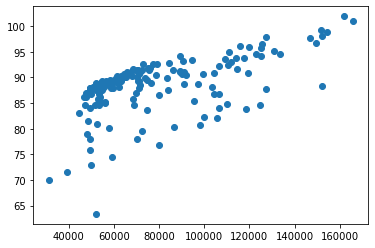

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_test['HouseholdIncome'],y_pred)

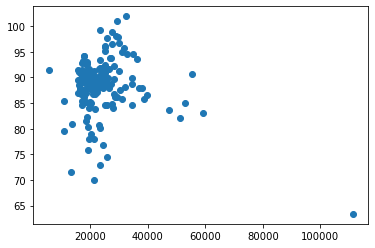

In [18]:
plt.scatter(X_test['FundingPerStudent'],y_pred)

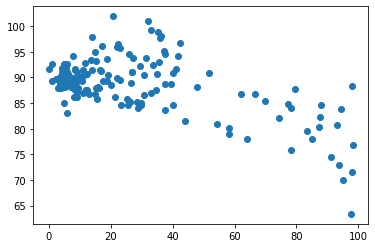

In [19]:
plt.scatter(X_test['Percentage of Minority Students'],y_pred)

In [20]:
# Create the model score
lasso.score(X_test, y_test)

0.1943944999503967

In [21]:
dump(lasso, 'C:/Users/Minet/Documents/Repositories/Dev10_Final_Project/Datasets/Altjoblib.model')

['C:/Users/Minet/Documents/Repositories/Dev10_Final_Project/Datasets/Altjoblib.model']

In [22]:
lasso.coef_

array([ 1.58944189e-04, -1.05178825e-04, -1.67244831e-01])